In [48]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)


import pandas as pd
import numpy as np
# 기존 plotnine(ggplot)코드를 pandas와 seaborn으로 변경
# from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium

In [4]:
shop = pd.read_csv("C:/Users/joyh1/Desktop/DSC/Inflearn강의자료/데이터분석/data/소상공인시장진흥공단_상가업소정보_201806_03.csv", encoding="cp949", engine="python")
shop.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28482144,부뚜막삼겹살,NaN,Q,음식,Q01,한식,Q01A02,갈비/삼겹살,I56111,...,4173025022100420000057910,NaN,경기도 여주시 여흥로109번길 10,469102,12622.0,NaN,1,NaN,127.635942,37.296409
1,28497846,나이키영통점,영통점,D,소매,D05,의복의류,D05A02,캐쥬얼/스포츠의류,G47416,...,4111710500109960004001202,NaN,경기도 수원시 영통구 봉영로 1612,443470,16704.0,NaN,7,NaN,127.074963,37.254463
2,28499066,눈빛안경.콘택트,NaN,D,소매,D18,사진/광학/정밀기기소매,D18A04,안경원,G47822,...,4136031021101050001000001,NaN,경기도 남양주시 별내면 청학로응달길 51-12,472811,12077.0,NaN,1,NaN,127.129433,37.709625
3,28493571,설국장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,4146510100109410000025298,NaN,경기도 용인시 수지구 풍덕천로190번길 19-1,448170,16833.0,NaN,1,NaN,127.102445,37.324824
4,28518376,파고망화장품,NaN,D,소매,D16,화장품소매,D16A01,화장품판매점,G47813,...,4159011600008240007020102,NaN,경기도 화성시 떡전골로 103,445390,18390.0,NaN,1,NaN,127.033253,37.207750


In [5]:
shop.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [49]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rc('font',family="Malgun Gothic")

In [9]:
shop['상권업종소분류명'].unique()

array(['갈비/삼겹살', '캐쥬얼/스포츠의류', '안경원', '모텔/여관/여인숙', '화장품판매점', '빠/카페/스탠드빠',
       '정통양식/경양식', '캠프/별장/펜션', '횟집', '국수/만두/칼국수', '아동복판매', '자동차정비/카센타',
       '셔츠/내의/속옷', '한복/갈옷/민속옷', '할인점', '편의점', '후라이드/양념치킨', '인테리어/욕실용품/커튼',
       '족발/보쌈전문', '한식/백반/한정식', '자동판매기운영', '방앗간/정미소', '떡전문', '반찬가게',
       '라면김밥분식', '참치전문점', '순대전문점', '종합부페', '낚시터', '룸살롱/단란주점',
       '커피전문점/카페/다방', '건강원', '기타고기요리', '수산물소매', '패스트푸드', '닭갈비전문',
       '곱창/양구이전문', '시장/종합상가', '소주방/포장마차', '해장국/감자탕', '제과점', '식료품점',
       '구내식당/자급식음식점', '수퍼마켓', '약국', '여성의류전문점', '죽전문점', '꼬치구이전문점', '호프/맥주',
       '찜닭전문점', '독서실', '식자재판매', '부동산중개', '도서/만화대여', '냉동식품판매', '기사식당',
       '피자전문', '인삼제품판매', '추어탕전문', '사무/문구용품', '여성미용실', '중국음식/중국집', '학원-입시',
       '노래방', '학원(종합)', '배관난방보일러', '탕제원', '패밀리레스토랑', '피아노/바이올린/기타', '기원',
       '철물/건설자재소매', '학원-만화영화', '동물병원', '한약방', '서예/서화/미술', '놀이방', '핸드폰소매',
       '남성의류전문점', '육류소매', '잡화점', '김치판매', '비만/피부관리', '정보통신기기수리', '컴퓨터수리',
       '학원-무용', '일반가구소매', '미싱판매', '옷수선', '주유소', '치과의원', '해물찜/탕전문', '태권도장',


In [10]:
# 패밀리레스토랑에 해당하는 데이터만 추출
restaurant = shop[shop['상권업종소분류명'] == "패밀리레스토랑"]

In [12]:
restaurant.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [13]:
# 필요한 칼럼들만 추출 for 패밀리레스토랑 상호명 별 분포도를 파악하기 위함
columns = ['상호명','지점명','상권업종소분류명','시도명','시군구명','행정동명','법정동명','도로명주소','경도','위도']
family = restaurant[columns]
family.head()

,상호명,지점명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
147,아웃백스테이크하우스원마운트점,원마운트점,패밀리레스토랑,경기도,고양시 일산서구,송포동,대화동,경기도 고양시 일산서구 한류월드로 300,126.754507,37.664544
237,애슐리,판교점,패밀리레스토랑,경기도,성남시 분당구,삼평동,삼평동,경기도 성남시 분당구 대왕판교로606번길 58,127.113542,37.395409
1075,이랜드파크외식애슐리,청주지웰시티점,패밀리레스토랑,충청북도,청주시 흥덕구,복대1동,복대동,충청북도 청주시 흥덕구 대농로 17,127.425105,36.642738
4006,아웃백스테이크하우스,미금점,패밀리레스토랑,경기도,성남시 분당구,구미1동,구미동,경기도 성남시 분당구 돌마로 46,127.106980,37.349684
14835,매드포갈릭,NaN,패밀리레스토랑,경기도,성남시 분당구,서현1동,서현동,경기도 성남시 분당구 분당로53번길 22,127.122854,37.384260


In [15]:
family.shape

(275, 10)

In [16]:
family['상호명'].unique().shape

(161,)

In [17]:
# 해당 데이터는 경기도, 충청북도, 강원도 지역에 해당
family['시도명'].unique()

array(['경기도', '충청북도', '강원도'], dtype=object)

In [18]:
# 경기도 데이터만 추출해보자
family_kkungi = family[family['시도명'] == "경기도"]
family_kkungi.head()

,상호명,지점명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
147,아웃백스테이크하우스원마운트점,원마운트점,패밀리레스토랑,경기도,고양시 일산서구,송포동,대화동,경기도 고양시 일산서구 한류월드로 300,126.754507,37.664544
237,애슐리,판교점,패밀리레스토랑,경기도,성남시 분당구,삼평동,삼평동,경기도 성남시 분당구 대왕판교로606번길 58,127.113542,37.395409
4006,아웃백스테이크하우스,미금점,패밀리레스토랑,경기도,성남시 분당구,구미1동,구미동,경기도 성남시 분당구 돌마로 46,127.106980,37.349684
14835,매드포갈릭,NaN,패밀리레스토랑,경기도,성남시 분당구,서현1동,서현동,경기도 성남시 분당구 분당로53번길 22,127.122854,37.384260
15331,무스쿠스,수원점,패밀리레스토랑,경기도,수원시 팔달구,인계동,인계동,경기도 수원시 팔달구 권광로 181,127.032211,37.263736


In [19]:
# 경기도에는 228개의 패밀리레스토랑이 존재
family_kkungi.shape

(228, 10)

# 아웃백스테이크와 애슐리의 데이터 분포를 비교해보자

In [32]:
# 아웃백스테이크와 애슐리 매장의 데이터만 추출하기 위해서 '아웃백' or '애슐' 문자열 둘 중 하나를 포함하는 데이터들만 추출
out_ash = family_kkungi[family_kkungi['상호명'].str.contains('아웃백|애슐')]
out_ash.head()

,상호명,지점명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
147,아웃백스테이크하우스원마운트점,원마운트점,패밀리레스토랑,경기도,고양시 일산서구,송포동,대화동,경기도 고양시 일산서구 한류월드로 300,126.754507,37.664544
237,애슐리,판교점,패밀리레스토랑,경기도,성남시 분당구,삼평동,삼평동,경기도 성남시 분당구 대왕판교로606번길 58,127.113542,37.395409
4006,아웃백스테이크하우스,미금점,패밀리레스토랑,경기도,성남시 분당구,구미1동,구미동,경기도 성남시 분당구 돌마로 46,127.106980,37.349684
24712,애슐리부천,NaN,패밀리레스토랑,경기도,부천시,상2동,상동,경기도 부천시 송내대로 239,126.756691,37.504131
25136,아웃백스테이크하우스,금오점,패밀리레스토랑,경기도,의정부시,자금동,금오동,경기도 의정부시 청사로48번길 25,127.071401,37.753107


In [33]:
out_ash.shape

(66, 10)

In [34]:
# 상호명이 제각각 이므로 통일시키기 위해서 새로운 칼럼인 '브랜드명'을 만들어주자
out_ash['브랜드명'] =''
out_ash.head()

,상호명,지점명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
147,아웃백스테이크하우스원마운트점,원마운트점,패밀리레스토랑,경기도,고양시 일산서구,송포동,대화동,경기도 고양시 일산서구 한류월드로 300,126.754507,37.664544,
237,애슐리,판교점,패밀리레스토랑,경기도,성남시 분당구,삼평동,삼평동,경기도 성남시 분당구 대왕판교로606번길 58,127.113542,37.395409,
4006,아웃백스테이크하우스,미금점,패밀리레스토랑,경기도,성남시 분당구,구미1동,구미동,경기도 성남시 분당구 돌마로 46,127.106980,37.349684,
24712,애슐리부천,NaN,패밀리레스토랑,경기도,부천시,상2동,상동,경기도 부천시 송내대로 239,126.756691,37.504131,
25136,아웃백스테이크하우스,금오점,패밀리레스토랑,경기도,의정부시,자금동,금오동,경기도 의정부시 청사로48번길 25,127.071401,37.753107,


In [35]:
out_ash.loc[out_ash['상호명'].str.contains('아웃백'), '브랜드명'] = '아웃백스테이크하우스'
out_ash.loc[out_ash['상호명'].str.contains('애슐'), '브랜드명'] = '애슐리'

In [36]:
out_ash[['상호명', '브랜드명']].head()

,상호명,브랜드명
147,아웃백스테이크하우스원마운트점,아웃백스테이크하우스
237,애슐리,애슐리
4006,아웃백스테이크하우스,아웃백스테이크하우스
24712,애슐리부천,애슐리
25136,아웃백스테이크하우스,아웃백스테이크하우스


In [39]:
out_ash_count = out_ash['브랜드명'].value_counts()
out_ash_count

애슐리           43
아웃백스테이크하우스    23
Name: 브랜드명, dtype: int64

In [45]:
ratio = out_ash_count[0]/out_ash_count[1]
print("애슐리 매장은 아웃백스테이크하우스 매장 갯수보다 {0:.2f}배 가량 많습니다".format(ratio))

애슐리 매장은 아웃백스테이크하우스 매장 갯수보다 1.87배 가량 많습니다


In [46]:
out_ash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 147 to 720409
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       66 non-null     object 
 1   지점명       51 non-null     object 
 2   상권업종소분류명  66 non-null     object 
 3   시도명       66 non-null     object 
 4   시군구명      66 non-null     object 
 5   행정동명      66 non-null     object 
 6   법정동명      66 non-null     object 
 7   도로명주소     66 non-null     object 
 8   경도        66 non-null     float64
 9   위도        66 non-null     float64
 10  브랜드명      66 non-null     object 
dtypes: float64(2), object(9)
memory usage: 6.2+ KB


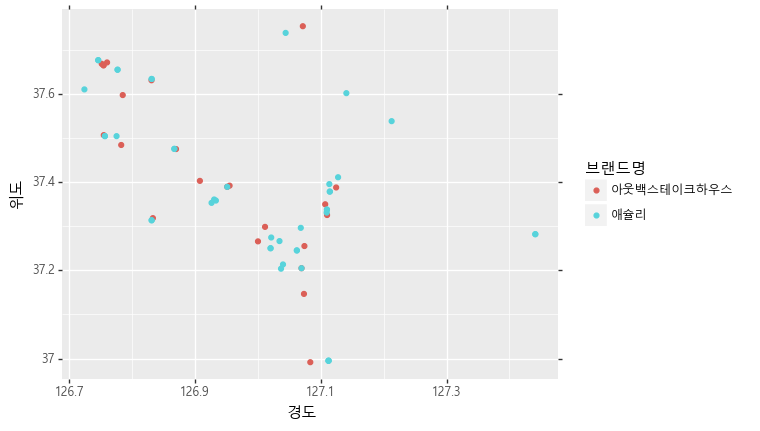

<ggplot: (155511451996)>

In [59]:
import matplotlib.pyplot as plt
from plotnine import *

(ggplot(out_ash)
 +aes(x='경도',y='위도', color='브랜드명')
 +geom_point()
 +theme(text=element_text(family="Malgun Gothic"))
)

In [61]:
# folium 라이브러리를 이용해서 실제 지도에 표시해보기
folium.Map?

In [72]:
out_ash.head(3)

,상호명,지점명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
147,아웃백스테이크하우스원마운트점,원마운트점,패밀리레스토랑,경기도,고양시 일산서구,송포동,대화동,경기도 고양시 일산서구 한류월드로 300,126.754507,37.664544,아웃백스테이크하우스
237,애슐리,판교점,패밀리레스토랑,경기도,성남시 분당구,삼평동,삼평동,경기도 성남시 분당구 대왕판교로606번길 58,127.113542,37.395409,애슐리
4006,아웃백스테이크하우스,미금점,패밀리레스토랑,경기도,성남시 분당구,구미1동,구미동,경기도 성남시 분당구 돌마로 46,127.106980,37.349684,아웃백스테이크하우스


In [98]:
def map_express(data):
    # 지도 초기화(해당 데이터프레임의 위도,경도 값의 평균값으로 지도 중심 맞추기) *** 위도 경도 순서 바뀌면안됨!
    map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, tiles='Stamen Terrain')
    
    for n in data.index:
        shop_name = data.loc[n, '브랜드명']+"-"+data.loc[n, '도로명주소']
        # 브랜드명별로 색깔 다르게 표시
        if data['브랜드명'][n] == "애슐리":
            icon_color = 'red'
        else:
            icon_color = 'blue'
        #지도에 표시               **** 이것도 위도/ 경도 순서 지켜야함!!! ****
        folium.Marker([data.loc[n, '위도'], data.loc[n, '경도']], popup=shop_name,
                     icon=folium.Icon(color=icon_color)).add_to(map)
    # 유니코드 문자 인코딩 못해서 html파일로 저장한 후 html파일 열면 한글 출력 됨(family.html파일 참고)
    map.save('familly.html')
    return map

In [99]:
map_express(out_ash)

In [102]:
def map_circle_express(data):
    # 지도 초기화(해당 데이터프레임의 위도,경도 값의 평균값으로 지도 중심 맞추기) *** 위도 경도 순서 바뀌면안됨!
    map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, tiles='Stamen Terrain')
    
    for n in data.index:
        shop_name = data.loc[n, '브랜드명']+"-"+data.loc[n, '도로명주소']
        # 브랜드명별로 색깔 다르게 표시
        if data['브랜드명'][n] == "애슐리":
            icon_color = 'red'
        else:
            icon_color = 'blue'
        #지도에 표시               **** 이것도 위도/ 경도 순서 지켜야함!!! ****
        folium.CircleMarker([data.loc[n, '위도'], data.loc[n, '경도']],radius=3, popup=shop_name, color=icon_color,fill= True, fill_color=icon_color).add_to(map)
    # 유니코드 문자 인코딩 못해서 html파일로 저장한 후 html파일 열면 한글 출력 됨(family.html파일 참고)
    map.save('familly2.html')
    return map

In [103]:
map_circle_express(out_ash)